## Organisation :
Dans ce second notebook, on souhaite comprendre et interpréter les données des études extraites dans le notebook précédent, notamment en générant des visualisations.

- On importe les données extraites dans le notebook précédent
- On vérifie la cohérence des données
- Génération des visualisations et repérage des données problématiques:
   
    + Champ 'HasResults'
    + Publications par type et par année
    + Délai entre la publication et la fin de l'étude
    + Délai entre la publication et le début de l'étude
    + Passages des données problématiques en type 'SUSPICIOUS'
    + Durée des études cliniques
    + Statut Open Access des publications

- Statistiques
- Export pour un traitement manuel

Installer `Seaborn`, si il n'est pas déjà présent:

`python -m pip install seaborn`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import de la DataFrame :

In [2]:
df_extract = pd.read_csv('Data/outputs/df_extract.csv', sep=';', encoding='utf-8-sig')
# df_extract.info()

In [3]:
df_extract = df_extract.astype(
    {
        # ClinicalTrial
        'OverallStatus': 'category',
        'StudyType': 'category',
        'type': 'category',

        'StudyFirstPostDate': 'datetime64[ns]',
        'StartDate': 'datetime64[ns]',
        'CompletionDate': 'datetime64[ns]',

        # Unpaywall
        'is_paratext': 'boolean',
        'published_date': 'datetime64[ns]',
        'is_oa': 'boolean',
        'oa_status': 'category',
        'has_repository_copy': 'boolean',

        'type_openalex': 'category',
        'primary_topic': 'category',
        'subfield': 'category',
        'field': 'category',
        'domain': 'category',
    }
)  # fmt: skip
df_extract = df_extract.convert_dtypes()
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NCTId                500 non-null    string        
 1   BriefTitle           500 non-null    string        
 2   LeadSponsorName      500 non-null    string        
 3   CollaboratorName     225 non-null    string        
 4   OverallStatus        500 non-null    category      
 5   StudyType            500 non-null    category      
 6   HasResults           500 non-null    boolean       
 7   StudyFirstPostDate   500 non-null    datetime64[ns]
 8   StartDate            500 non-null    datetime64[ns]
 9   CompletionDate       500 non-null    datetime64[ns]
 10  pmid                 394 non-null    Int64         
 11  type                 394 non-null    category      
 12  title                394 non-null    string        
 13  authors              394 non-null  

In [4]:
df_extract

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,...,is_paratext,published_date,is_oa,oa_status,has_repository_copy,type_openalex,primary_topic,subfield,field,domain
0,NCT02592174,"Prevalence, Characteristics and Risk Factors o...","ANRS, Emerging Infectious Diseases",Merck Sharp & Dohme LLC,COMPLETED,INTERVENTIONAL,False,2015-10-30,2016-01-26,2017-10-27,...,False,2019-07-25,True,hybrid,False,article,Human Immunodeficiency Virus/Acquired Immunode...,Virology,Immunology and Microbiology,Life Sciences
1,NCT02273765,Raltegravir Versus Efavirenz in Naive HIV-1-in...,"ANRS, Emerging Infectious Diseases","Merck Sharp & Dohme LLC | Ministry of Health, ...",COMPLETED,INTERVENTIONAL,False,2014-10-24,2015-09-11,2018-11-28,...,False,2021-06-01,True,green,True,article,Efficacy and Safety of Antiretroviral Therapy ...,Infectious Diseases,Medicine,Health Sciences
2,NCT05311865,Transmission of Covid-19 During Clubbing Event...,"ANRS, Emerging Infectious Diseases",Cerballiance | Kappa Santé,COMPLETED,INTERVENTIONAL,False,2022-04-05,2021-09-04,2022-02-26,...,False,2022-11-04,True,green,True,article,Coronavirus Disease 2019 Research,Infectious Diseases,Medicine,Health Sciences
3,NCT05311865,Transmission of Covid-19 During Clubbing Event...,"ANRS, Emerging Infectious Diseases",Cerballiance | Kappa Santé,COMPLETED,INTERVENTIONAL,False,2022-04-05,2021-09-04,2022-02-26,...,False,2023-10-05,True,hybrid,True,article,Coronavirus Disease 2019 Research,Infectious Diseases,Medicine,Health Sciences
4,NCT02107365,"Therapy With Asunaprevir, Daclatasvir, Ribavir...","ANRS, Emerging Infectious Diseases",Bristol-Myers Squibb,COMPLETED,INTERVENTIONAL,False,2014-04-08,2013-11-01,2015-04-01,...,<NA>,NaT,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NCT02481453,Rapamycine vs Placebo for the Treatment of Inc...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2015-06-25,2015-07-15,2018-01-22,...,False,2010-06-01,True,bronze,False,article,"Epidemiology, Classification, and Clinical Fea...",Epidemiology,Medicine,Health Sciences
496,NCT02481453,Rapamycine vs Placebo for the Treatment of Inc...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2015-06-25,2015-07-15,2018-01-22,...,False,2014-07-29,True,green,True,article,"Epidemiology, Classification, and Clinical Fea...",Epidemiology,Medicine,Health Sciences
497,NCT02481453,Rapamycine vs Placebo for the Treatment of Inc...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2015-06-25,2015-07-15,2018-01-22,...,False,2021-01-01,True,bronze,True,article,"Epidemiology, Classification, and Clinical Fea...",Epidemiology,Medicine,Health Sciences
498,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,Institut National de la Santé Et de la Recherc...,"EVI Industries, Inc. | Recherche Clinique Pari...",COMPLETED,INTERVENTIONAL,False,2016-01-18,2016-01-01,2019-02-21,...,False,2021-02-25,True,gold,True,article,Malaria,"Public Health, Environmental and Occupational ...",Medicine,Health Sciences


## Vérification des données

### Nombre d'études :

In [5]:
df_extract.loc[:, 'NCTId'].nunique()

201

### Nombre de publications :

#### PMIDs :

Nombre de pmids total:

In [6]:
df_extract.loc[:, 'pmid'].count()

394

Nombre de pmids uniques:

In [7]:
df_extract.loc[:, 'pmid'].nunique()

388

Etudes qui partagent une publication :

In [8]:
df_extract.loc[
    df_extract['pmid'].notna() & df_extract['pmid'].duplicated(keep=False),
    ['NCTId', 'BriefTitle', 'pmid', 'type', 'title', 'doi'],
].sort_values(by='pmid')

,NCTId,BriefTitle,pmid,type,title,doi
50,NCT00136630,"Natural History, Genetic Bases and Phenotype-g...",24780882,DERIVED,Prediction of the age at onset in spinocerebel...,10.1136/jmedgenet-2013-102200
471,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,24780882,DERIVED,Prediction of the age at onset in spinocerebel...,10.1136/jmedgenet-2013-102200
149,NCT01882062,Proof of Concept of an Anaplerotic Study Using...,25568297,RESULT,Triheptanoin improves brain energy metabolism ...,10.1212/WNL.0000000000001214
211,NCT01696708,Utilization of 31P-Nuclear Magnetic Resonance ...,25568297,DERIVED,Triheptanoin improves brain energy metabolism ...,10.1212/WNL.0000000000001214
38,NCT00640263,Comparison of Efficacy and Safety of Infant Pe...,26603917,DERIVED,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
237,NCT03870438,Prevention of Mother-to-child Transmission of ...,26603917,BACKGROUND,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
242,NCT03519503,Infant Peri-Exposure Prophylaxis to Prevent HI...,26603917,BACKGROUND,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
92,NCT04008927,A Community-based Intervention Among Active Dr...,27178119,BACKGROUND,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698
104,NCT02573948,Feasibility of Interventions on People Who Inj...,27178119,RESULT,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698
335,NCT03537196,DRug Use & Infections in ViEtnam - Hepatitis C...,27178119,BACKGROUND,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698


In [9]:
num_duplicate_pmid = len(
    df_extract.loc[df_extract['pmid'].notna() & df_extract['pmid'].duplicated(), 'pmid']
)

assert (
    df_extract.loc[:, 'pmid'].count()
    == df_extract.loc[:, 'pmid'].nunique() + num_duplicate_pmid
)

#### DOIs :

Nombre de DOI total:

In [10]:
df_extract.loc[:, 'doi'].count()

393

Nombre de DOI uniques:

In [11]:
df_extract.loc[:, 'doi'].nunique()

387

Etude avec un PMID mais sans DOI :

In [12]:
df_extract.loc[
    df_extract.loc[:, 'pmid'].notna() & df_extract.loc[:, 'doi'].isna(),
    ['NCTId', 'BriefTitle', 'pmid', 'type', 'title', 'doi'],
]

,NCTId,BriefTitle,pmid,type,title,doi
341,NCT03537196,DRug Use & Infections in ViEtnam - Hepatitis C...,19839502,BACKGROUND,High prevalence of Hepatitis C virus genotype ...,<NA>


In [13]:
num_duplicate_doi = len(
    df_extract.loc[df_extract['doi'].notna() & df_extract['doi'].duplicated(), ['doi']]
)

assert (
    df_extract.loc[:, 'doi'].count()
    == df_extract.loc[:, 'doi'].nunique() + num_duplicate_doi
)

### Vérification des sponsors:

In [14]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'LeadSponsorName'].value_counts()

LeadSponsorName
Institut National de la Santé Et de la Recherche Médicale, France    113
ANRS, Emerging Infectious Diseases                                    77
French National Agency for Research on AIDS and Viral Hepatitis        8
Paris Cardiovascular Research Center (Inserm U970)                     2
Programme PAC-CI, Site ANRS-MIE de Côte d'Ivoire                       1
Name: count, dtype: Int64

### Vérification des dates :

#### StudyFirstPostDate :

In [100]:
(
    df_extract.drop_duplicates(subset='NCTId')
    .loc[:, 'StudyFirstPostDate']
    .notna()
    .value_counts()
)

StudyFirstPostDate
True    201
Name: count, dtype: int64

#### StartDate :

In [16]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'StartDate'].notna().value_counts()

StartDate
True    201
Name: count, dtype: int64

#### CompletionDate :

In [97]:
(
    df_extract.drop_duplicates(subset='NCTId')
    .loc[:, 'CompletionDate']
    .notna()
    .value_counts()
)

CompletionDate
True    201
Name: count, dtype: int64

#### Nombre d'études dont la date de fin est après 2013 :

In [18]:
(
    df_extract.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].dt.year >= 2013
).value_counts()

CompletionDate
True    201
Name: count, dtype: int64

#### published_date :

Si le DOI est \<NA>, alors 'published_date' est \<NA> car on interroge Unpaywall via le DOI :

In [19]:
df_extract.loc[:, 'published_date'].notna().value_counts()

published_date
True     393
False    107
Name: count, dtype: int64

## Champ 'HasResults':

Etudes dont le champ 'HasResults' est True:

In [20]:
df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()

<StringArray>
['NCT02453048', 'NCT02573948', 'NCT01882062', 'NCT01605890', 'NCT02212379',
 'NCT00928187']
Length: 6, dtype: string

In [21]:
df_extract.loc[df_extract.loc[:, 'HasResults'], ['NCTId', 'HasResults', 'type']]

,NCTId,HasResults,type
16,NCT02453048,True,BACKGROUND
17,NCT02453048,True,BACKGROUND
18,NCT02453048,True,DERIVED
19,NCT02453048,True,BACKGROUND
20,NCT02453048,True,BACKGROUND
21,NCT02453048,True,BACKGROUND
22,NCT02453048,True,BACKGROUND
23,NCT02453048,True,BACKGROUND
24,NCT02453048,True,BACKGROUND
25,NCT02453048,True,DERIVED


In [22]:
nb_studies = len(df_extract.loc[:, 'NCTId'].unique())
nb_studies_has_result = len(
    df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()
)
print("Nombre d'etudes dont le champ 'HasResults' est True:")
print(f'{nb_studies_has_result}/{nb_studies}')

Nombre d'etudes dont le champ 'HasResults' est True:
6/201


**Le nombre très faible d'études qui renseignent le champ 'HasResults', fait que l'on peut difficilement exploiter cette donnée**.

Mais quand le champs est renseigné, on a affaire à des études de qualité, où l'on peut généralement se fier aux types de publication indiqué.

## Publications par type et par année:

Nombre de publications par année:

In [23]:
df_year_type = df_extract.loc[:, ['published_date', 'type']].dropna()
df_year_type['year'] = df_year_type['published_date'].dt.year.astype(int)
df_year_type = df_year_type.drop(columns='published_date')
df_year_type

,type,year
0,DERIVED,2019
1,DERIVED,2021
2,PUBMED,2022
3,PUBMED,2023
5,DERIVED,2020
...,...,...
495,BACKGROUND,2010
496,BACKGROUND,2014
497,PUBMED,2021
498,DERIVED,2021


In [24]:
publications_per_year_pivot_table = pd.pivot_table(
    df_year_type,
    index='year',
    columns='type',
    aggfunc='size',
    fill_value=0,
    observed=False,
)
publications_per_year_pivot_table

type,BACKGROUND,DERIVED,PUBMED,RESULT
year,,,,
1980,0,0,0,1
1990,0,0,0,1
1991,1,0,0,0
1994,1,0,0,0
1999,1,0,0,0
2000,1,0,0,0
2002,1,0,0,0
2003,0,0,0,1
2004,0,0,0,4


In [25]:
min_year = df_year_type.loc[:, 'year'].min()
max_year = df_year_type.loc[:, 'year'].max()
print(f'{min_year=}, {max_year=}')

min_year=1980, max_year=2024


In [26]:
palette = {'BACKGROUND': 'C0', 'DERIVED': 'C1', 'PUBMED': 'C3', 'RESULT': 'C2'}

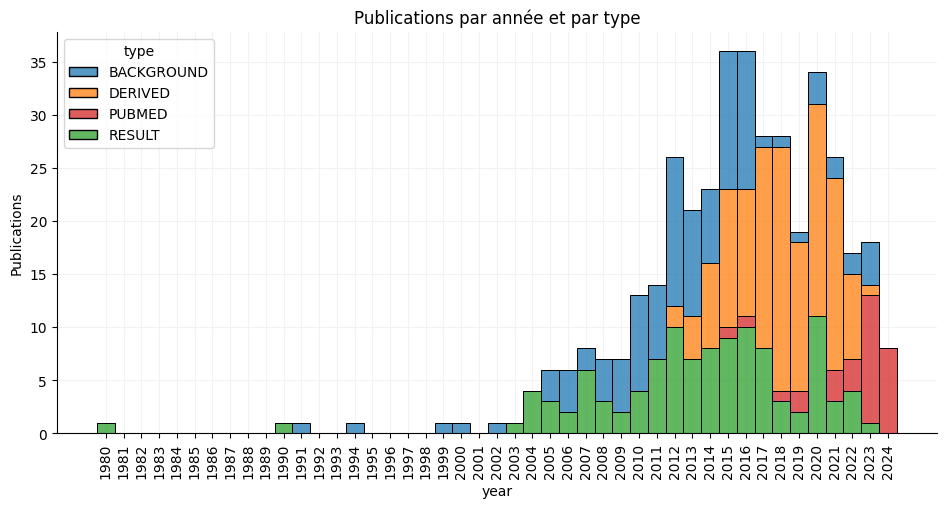

In [27]:
g = sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# x axis ticks
g.set_xticks(range(min_year, max_year + 1))
g.tick_params(axis='x', labelrotation=90)

# Grid
g.grid(color='0.95')
g.set_axisbelow(True)

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(title='Publications par année et par type', ylabel='Publications')

# Remove spines
sns.despine()

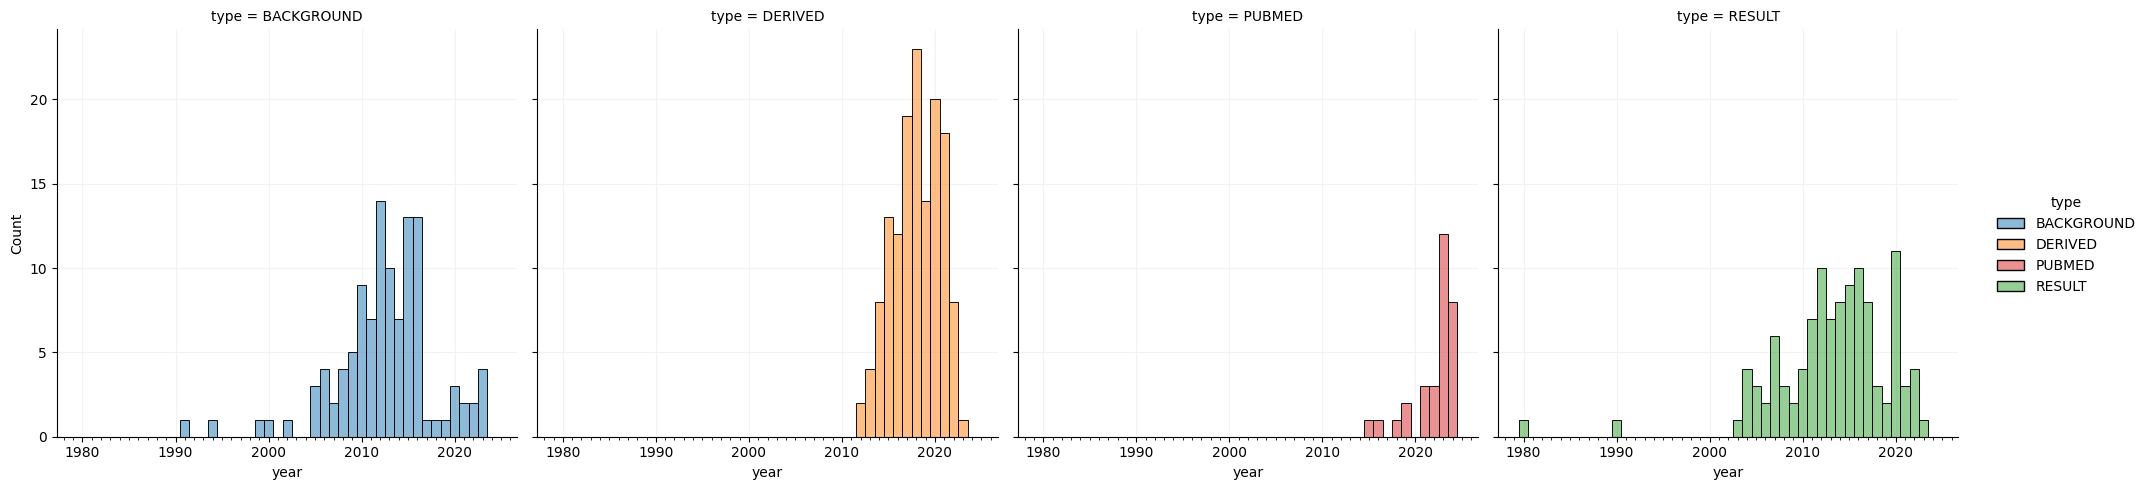

In [28]:
from matplotlib.ticker import AutoMinorLocator

g = sns.displot(
    data=df_year_type,
    x='year',
    hue='type',
    kind='hist',
    col='type',
    discrete=True,
    palette=palette,
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

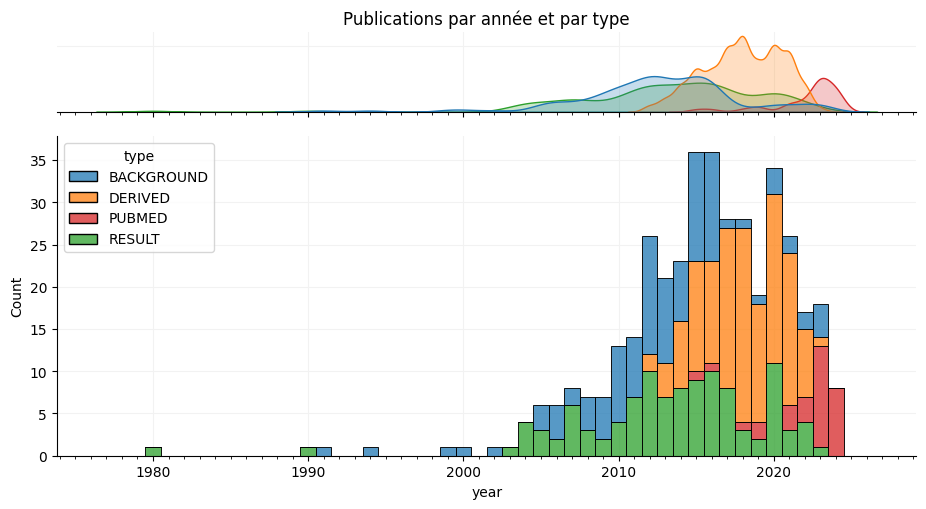

In [29]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=df_year_type,
    x='year',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title='Publications par année et par type', ylabel='')

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

On remarque deux valeurs extrêmes qui sont classées comme **'RESULT'** :

In [30]:
mask = df_extract.loc[:, 'published_date'].dt.year <= 1990
columns_to_display = [
    'NCTId',
    'BriefTitle',
    'CompletionDate',
    'pmid',
    'type',
    'title',
    'doi',
    'published_date',
]

df_extract.loc[mask, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
206,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990-11-01
230,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980-03-01


Pour chacune de ces études, toutes leurs publications sont classées comme **'RESULT'**:

In [31]:
nctids = df_extract.loc[mask, 'NCTId']

In [32]:
mask_0 = df_extract.loc[:, 'NCTId'] == nctids.iloc[0]

df_extract.loc[mask_0, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
204,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,12914551,RESULT,Pharmacokinetic-pharmacodynamic study of apomo...,10.1046/j.1472-8206.2003.00152.x,2003-07-07
205,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15249613,RESULT,PET evidence for a role of the basal ganglia i...,10.1212/01.wnl.0000132840.40838.13,2004-07-13
206,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990-11-01
207,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15037514,RESULT,Effect of acute and chronic lamotrigine on bas...,10.1038/sj.bjp.0705737,2004-05-01
208,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15777732,RESULT,"Lamotrigine, carbamazepine and phenytoin diffe...",10.1016/j.eplepsyres.2005.02.002,2005-02-01


In [33]:
mask_1 = df_extract.loc[:, 'NCTId'] == nctids.iloc[1]

df_extract.loc[mask_1, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
228,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,22639796,RESULT,Linking visual response properties in the supe...,10.1111/j.1460-9568.2012.08079.x,2012-05-28
229,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,23916713,RESULT,Enhanced visual responses in the superior coll...,10.1016/j.neuroscience.2013.07.047,2013-11-01
230,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980-03-01


**Certaine etudes cliniques classent toutes les publications associées comme 'RESULT', on ne peut donc pas se fier a cette valeur**

Les etudes dont toutes les publications sont de type 'RESULT' :

In [34]:
nctids = df_extract.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_extract.loc[:, 'NCTId'] == nctid
    if (df_extract.loc[mask, 'type'] == 'RESULT').all():
        res.append(nctid)
print(res)
print(f'{len(res)=}')

['NCT04470648', 'NCT01882062', 'NCT01490489', 'NCT01432821', 'NCT02488395', 'NCT03235258', 'NCT02916732']
len(res)=7


In [35]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(res), ['NCTId', 'type']].head(10)

,NCTId,type
7,NCT04470648,RESULT
8,NCT04470648,RESULT
9,NCT04470648,RESULT
10,NCT04470648,RESULT
11,NCT04470648,RESULT
12,NCT04470648,RESULT
13,NCT04470648,RESULT
14,NCT04470648,RESULT
149,NCT01882062,RESULT
151,NCT01490489,RESULT


## Délai entre la publication et la fin de l'étude :

In [36]:
df_completion_date = (
    df_extract.loc[:, ['NCTId', 'type', 'CompletionDate', 'published_date']].dropna()
)  # fmt: skip
df_completion_date

,NCTId,type,CompletionDate,published_date
0,NCT02592174,DERIVED,2017-10-27,2019-07-25
1,NCT02273765,DERIVED,2018-11-28,2021-06-01
2,NCT05311865,PUBMED,2022-02-26,2022-11-04
3,NCT05311865,PUBMED,2022-02-26,2023-10-05
5,NCT02099474,DERIVED,2017-04-01,2020-09-21
...,...,...,...,...
495,NCT02481453,BACKGROUND,2018-01-22,2010-06-01
496,NCT02481453,BACKGROUND,2018-01-22,2014-07-29
497,NCT02481453,PUBMED,2018-01-22,2021-01-01
498,NCT02658253,DERIVED,2019-02-21,2021-02-25


In [37]:
# Example: If we have 190 days between 'published_date' and 'CompletionDate'
# When we rounds up to years, we obtains 0.52 years,
# If we use the round() function, we will obtain 1 year, when in fact less than a year passed
# The floor() function seems more appropriate

# Example: If we have -77 days between 'published_date' and 'CompletionDate'
# When we rounds up to years, we obtains -0.21 years,
# If we use the floor() function, we will obtain -1 year, when in fact less than a year passed
# We need to use the fix() function from Numpy

# > Some spreadsheet programs calculate the “floor-towards-zero”, where floor(-2.5) == -2.
# > NumPy instead uses the definition of floor where floor(-2.5) == -3. The “floor-towards-zero” function is called fix in NumPy.

In [38]:
time_completion_publication = np.fix(
    (
        df_completion_date.loc[:, 'published_date']
        - df_completion_date.loc[:, 'CompletionDate']
    ).apply(lambda x: x.days / 365)
).astype(int)

time_completion_publication = (
    time_completion_publication.rename('TimeCompletionPublication')
)  # fmt: skip
time_completion_publication = df_completion_date.join(time_completion_publication)
time_completion_publication

,NCTId,type,CompletionDate,published_date,TimeCompletionPublication
0,NCT02592174,DERIVED,2017-10-27,2019-07-25,1
1,NCT02273765,DERIVED,2018-11-28,2021-06-01,2
2,NCT05311865,PUBMED,2022-02-26,2022-11-04,0
3,NCT05311865,PUBMED,2022-02-26,2023-10-05,1
5,NCT02099474,DERIVED,2017-04-01,2020-09-21,3
...,...,...,...,...,...
495,NCT02481453,BACKGROUND,2018-01-22,2010-06-01,-7
496,NCT02481453,BACKGROUND,2018-01-22,2014-07-29,-3
497,NCT02481453,PUBMED,2018-01-22,2021-01-01,2
498,NCT02658253,DERIVED,2019-02-21,2021-02-25,2


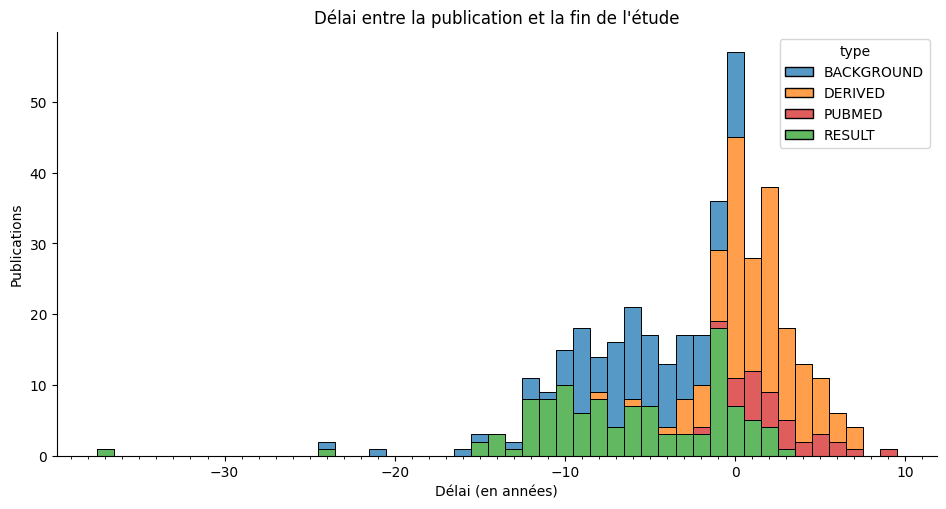

In [39]:
g = sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

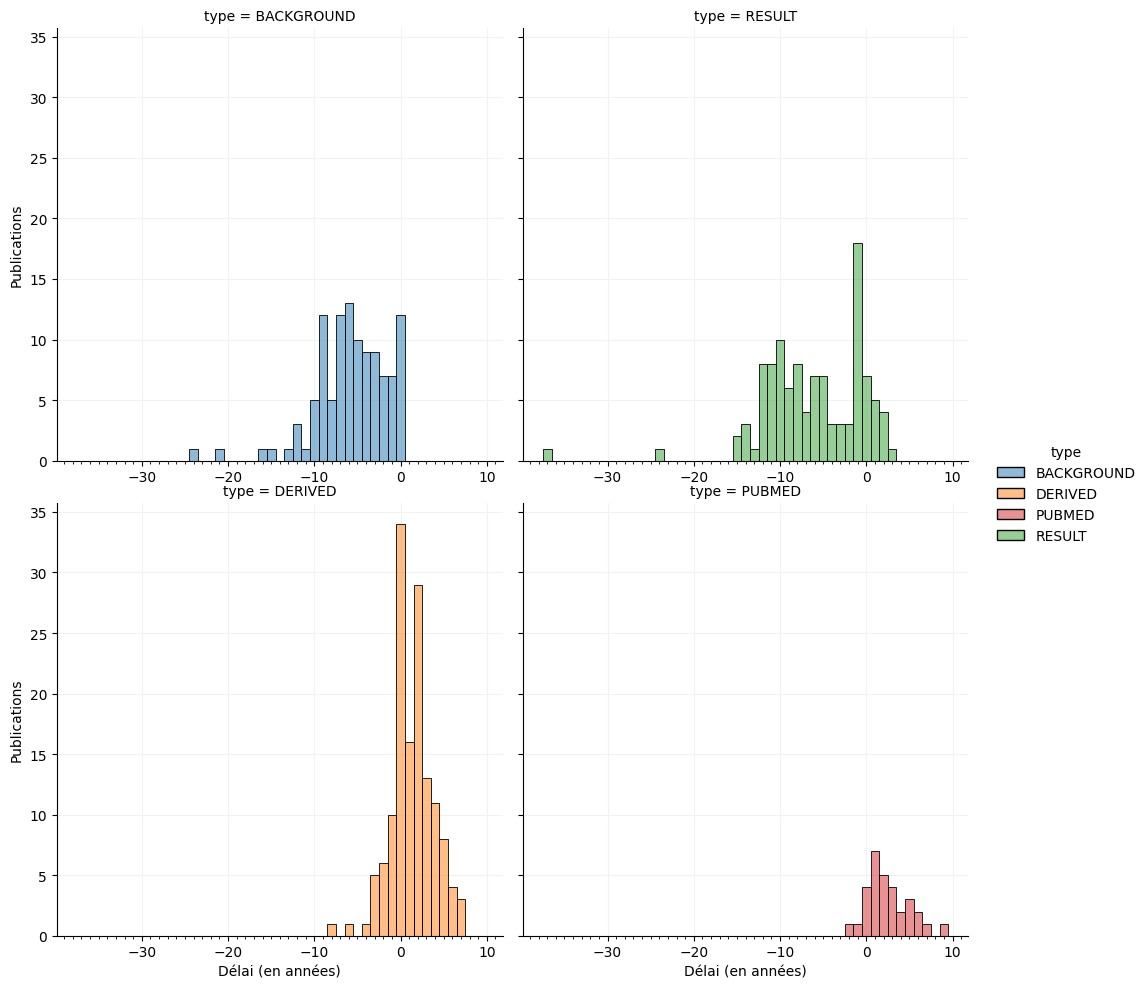

In [40]:
g = sns.displot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT', 'DERIVED', 'PUBMED'],
    col_wrap=2,
    discrete=True,
    kind='hist',
    palette=palette,
)

g.tick_params(labelbottom=True)
g.set_axis_labels('Délai (en années)', 'Publications')

for ax in g.axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Problablement des publications de type 'RESULT' parmis les 'DERIVED'**

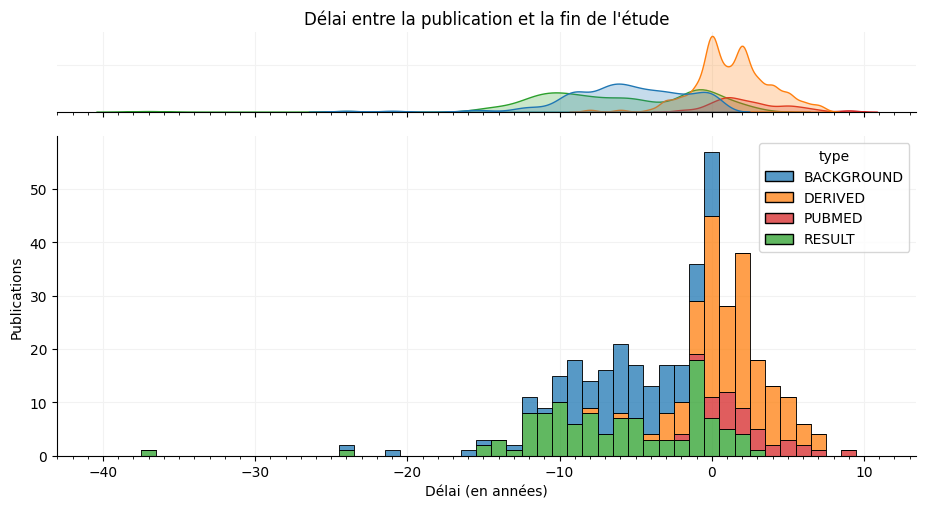

In [41]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et la fin de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

In [42]:
# for type in ['BACKGROUND', 'DERIVED', 'PUBMED', 'RESULT']:
#     mask_type = (time_completion_publication.loc[:, 'type'] == type)
#     df_type = time_completion_publication.loc[mask_type, 'TimeCompletionPublication']
#     df_type = df_type.reindex(time_completion_publication.index)

#     axs = df_type.plot.barh(
#         # x = time_completion_publication.index,
#         y = 'TimeCompletionPublication',
#         figsize = (5, 20),
#         color = palette[type],
#     )

# axs.invert_yaxis()
# axs.yaxis.set_visible(False)
# axs.set_frame_on(False)

# # Title
# axs.set(
#     xlabel='Délai (en années)'
# )

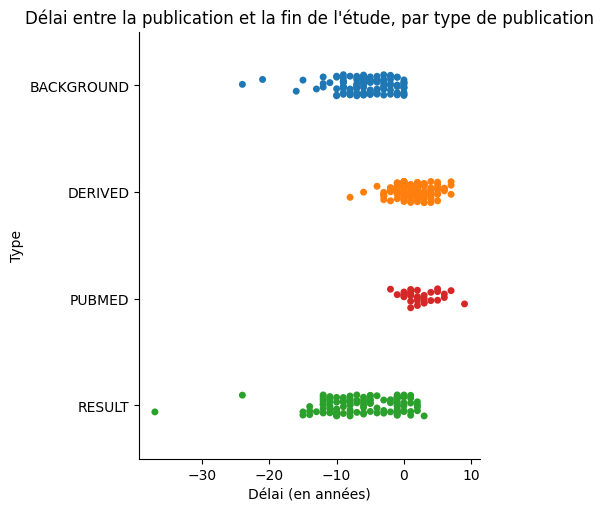

In [43]:
g = sns.catplot(
    data=time_completion_publication.dropna(),
    x='TimeCompletionPublication',
    y='type',
    hue='type',
    jitter=True,
    palette=palette,
)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude, par type de publication",
    xlabel='Délai (en années)',
    ylabel='Type',
)

## Délai entre la publication et le début de l'étude :

In [44]:
df_start_date = (
    df_extract.loc[:, ['NCTId', 'type', 'StartDate', 'published_date']].dropna()
)  # fmt: skip
df_start_date

,NCTId,type,StartDate,published_date
0,NCT02592174,DERIVED,2016-01-26,2019-07-25
1,NCT02273765,DERIVED,2015-09-11,2021-06-01
2,NCT05311865,PUBMED,2021-09-04,2022-11-04
3,NCT05311865,PUBMED,2021-09-04,2023-10-05
5,NCT02099474,DERIVED,2014-06-30,2020-09-21
...,...,...,...,...
495,NCT02481453,BACKGROUND,2015-07-15,2010-06-01
496,NCT02481453,BACKGROUND,2015-07-15,2014-07-29
497,NCT02481453,PUBMED,2015-07-15,2021-01-01
498,NCT02658253,DERIVED,2016-01-01,2021-02-25


In [45]:
time_start_publication = np.fix(
    (
        df_start_date.loc[:, 'published_date']
        - df_start_date.loc[:, 'StartDate']
    ).apply(lambda x: x.days / 365)
).astype(int)  # fmt: skip

time_start_publication = time_start_publication.rename('TimeStartPublication')
time_start_publication = df_start_date.join(time_start_publication)
time_start_publication

,NCTId,type,StartDate,published_date,TimeStartPublication
0,NCT02592174,DERIVED,2016-01-26,2019-07-25,3
1,NCT02273765,DERIVED,2015-09-11,2021-06-01,5
2,NCT05311865,PUBMED,2021-09-04,2022-11-04,1
3,NCT05311865,PUBMED,2021-09-04,2023-10-05,2
5,NCT02099474,DERIVED,2014-06-30,2020-09-21,6
...,...,...,...,...,...
495,NCT02481453,BACKGROUND,2015-07-15,2010-06-01,-5
496,NCT02481453,BACKGROUND,2015-07-15,2014-07-29,0
497,NCT02481453,PUBMED,2015-07-15,2021-01-01,5
498,NCT02658253,DERIVED,2016-01-01,2021-02-25,5


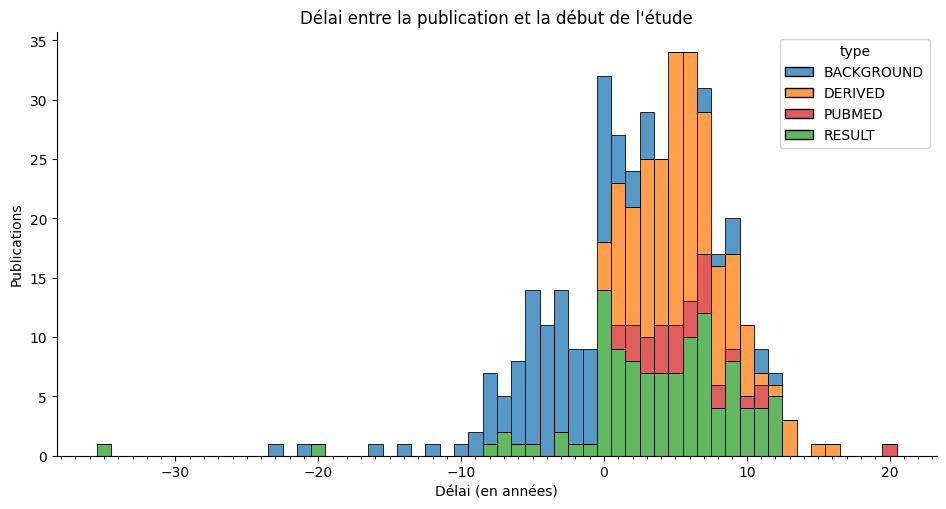

In [46]:
g = sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la début de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

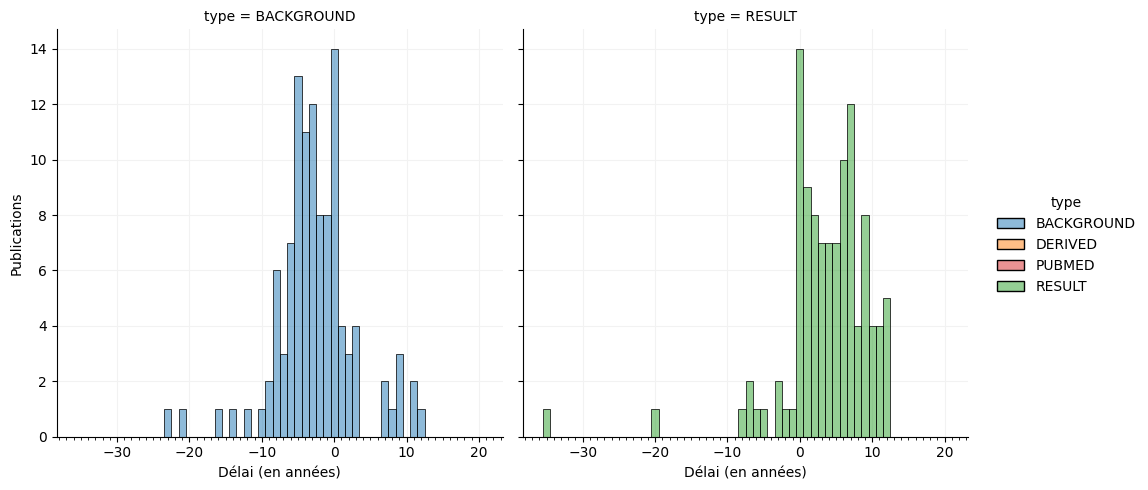

In [47]:
g = sns.displot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT'],
    discrete=True,
    kind='hist',
    palette=palette,
)
# g.set_ylabels('Publications')

# Title
g.set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

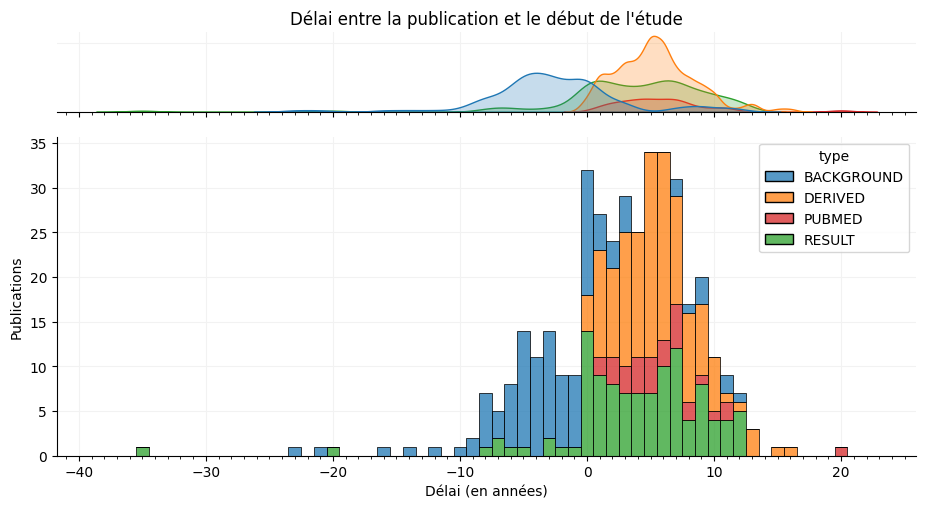

In [48]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et le début de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

**Les publications de type 'RESULT' avant la date de début de l'étude sont problématiques -> Les passer en type 'SUSPICIOUS' ?**

**Le cluster de publications de type 'BACKGROUND' 10 ans après le début des études est suspect.**  S'agit-il de 'RESULT' ?

Publications de type 'RESULT' dont la date de publication est antérieur à la date de début de l'essai clinique :

In [49]:
mask_result = df_extract.loc[:, 'type'] == 'RESULT'
mask_time_neg = df_extract.loc[:, 'published_date'] < df_extract.loc[:, 'StartDate']

df_extract.loc[
    mask_result & mask_time_neg,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
]

,NCTId,pmid,type,StartDate,published_date
7,NCT04470648,32338732,RESULT,2020-07-22,2020-06-02
8,NCT04470648,32109013,RESULT,2020-07-22,2020-04-30
9,NCT04470648,32046819,RESULT,2020-07-22,2020-02-06
10,NCT04470648,32070465,RESULT,2020-07-22,2020-02-13
11,NCT04470648,31995857,RESULT,2020-07-22,2020-03-26
12,NCT04470648,31978945,RESULT,2020-07-22,2020-02-20
13,NCT04470648,32371096,RESULT,2020-07-22,2020-06-01
14,NCT04470648,32224310,RESULT,2020-07-22,2020-06-01
53,NCT00136630,15365159,RESULT,2005-05-01,2004-09-14
54,NCT00136630,15313841,RESULT,2005-05-01,2004-08-01


On remarque que juste quelques d'études concentrent ces publications problématiques :

In [50]:
nctids = df_extract.loc[mask_result & mask_time_neg].loc[:, 'NCTId'].unique()
nctids

<StringArray>
['NCT04470648', 'NCT00136630', 'NCT01490489', 'NCT01432821', 'NCT02488395']
Length: 5, dtype: string

Ces etudes cliniques semblent classer toutes leurs publications comme 'RESULT' :

In [51]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(nctids), ['NCTId', 'type']]

,NCTId,type
7,NCT04470648,RESULT
8,NCT04470648,RESULT
9,NCT04470648,RESULT
10,NCT04470648,RESULT
11,NCT04470648,RESULT
12,NCT04470648,RESULT
13,NCT04470648,RESULT
14,NCT04470648,RESULT
50,NCT00136630,DERIVED
51,NCT00136630,RESULT


### Les publications de type 'RESULT' avant la date de début de l'étude sont problématique, on les passe en type 'SUSPICIOUS' :

In [52]:
df_extract.loc[
    mask_result & mask_time_neg,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
]

,NCTId,pmid,type,StartDate,published_date
7,NCT04470648,32338732,RESULT,2020-07-22,2020-06-02
8,NCT04470648,32109013,RESULT,2020-07-22,2020-04-30
9,NCT04470648,32046819,RESULT,2020-07-22,2020-02-06
10,NCT04470648,32070465,RESULT,2020-07-22,2020-02-13
11,NCT04470648,31995857,RESULT,2020-07-22,2020-03-26
12,NCT04470648,31978945,RESULT,2020-07-22,2020-02-20
13,NCT04470648,32371096,RESULT,2020-07-22,2020-06-01
14,NCT04470648,32224310,RESULT,2020-07-22,2020-06-01
53,NCT00136630,15365159,RESULT,2005-05-01,2004-09-14
54,NCT00136630,15313841,RESULT,2005-05-01,2004-08-01


On change le type en 'SUSPICIOUS':

In [53]:
# Copy previous df
df_corrected = df_extract.copy()

# Add new 'SUSPICIOUS' category
df_corrected['type'] = (
    df_corrected['type'].cat.add_categories('SUSPICIOUS').astype('category')
)

# Change type to 'SUSPICIOUS'
df_corrected.loc[mask_result & mask_time_neg, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [54]:
# Make sure df_corrected and time_start_publication have the same index for the join
df_corrected.loc[
    mask_result & mask_time_neg,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
].join(time_start_publication.loc[:, 'TimeStartPublication'])

,NCTId,pmid,type,StartDate,published_date,TimeStartPublication
7,NCT04470648,32338732,SUSPICIOUS,2020-07-22,2020-06-02,0
8,NCT04470648,32109013,SUSPICIOUS,2020-07-22,2020-04-30,0
9,NCT04470648,32046819,SUSPICIOUS,2020-07-22,2020-02-06,0
10,NCT04470648,32070465,SUSPICIOUS,2020-07-22,2020-02-13,0
11,NCT04470648,31995857,SUSPICIOUS,2020-07-22,2020-03-26,0
12,NCT04470648,31978945,SUSPICIOUS,2020-07-22,2020-02-20,0
13,NCT04470648,32371096,SUSPICIOUS,2020-07-22,2020-06-01,0
14,NCT04470648,32224310,SUSPICIOUS,2020-07-22,2020-06-01,0
53,NCT00136630,15365159,SUSPICIOUS,2005-05-01,2004-09-14,0
54,NCT00136630,15313841,SUSPICIOUS,2005-05-01,2004-08-01,0


### Les publications de type 'BACKGROUND' après la date de fin de l'étude sont problématiques, on veut les passer en 'SUSPICIOUS' :

In [55]:
mask_background = df_extract.loc[:, 'type'] == 'BACKGROUND'
mask_time_pos = (
    df_extract.loc[:, 'published_date'] > df_extract.loc[:, 'CompletionDate']
)

df_extract.loc[
    mask_background & mask_time_pos,
    ['NCTId', 'pmid', 'type', 'CompletionDate', 'published_date'],
]

,NCTId,pmid,type,CompletionDate,published_date
382,NCT03137797,27509048,BACKGROUND,2016-06-01,2016-08-10


On change le type en 'SUSPICIOUS':

In [56]:
# change type to 'SUSPICIOUS'
df_corrected.loc[mask_background & mask_time_pos, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [57]:
# Make sure df_corrected and time_start_publication have the same index for the join
df_corrected.loc[
    mask_background & mask_time_pos,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
].join(time_completion_publication.loc[:, 'TimeCompletionPublication'])

,NCTId,pmid,type,StartDate,published_date,TimeCompletionPublication
382,NCT03137797,27509048,SUSPICIOUS,2004-02-01,2016-08-10,0


## Durée des études cliniques :

In [58]:
df_start_completion = (
    df_extract.drop_duplicates(subset='NCTId')
    .loc[:, ['NCTId', 'StartDate', 'CompletionDate']]
    .dropna()
)
df_start_completion

,NCTId,StartDate,CompletionDate
0,NCT02592174,2016-01-26,2017-10-27
1,NCT02273765,2015-09-11,2018-11-28
2,NCT05311865,2021-09-04,2022-02-26
4,NCT02107365,2013-11-01,2015-04-01
5,NCT02099474,2014-06-30,2017-04-01
...,...,...,...
481,NCT01688453,2012-04-01,2015-11-01
487,NCT00495651,2008-03-01,2015-01-01
494,NCT02027051,2014-01-01,2017-01-01
495,NCT02481453,2015-07-15,2018-01-22


In [59]:
time_study_duration = (
    df_start_completion.loc[:, 'CompletionDate']
    - df_start_completion.loc[:, 'StartDate']
)
time_study_duration = time_study_duration.rename('StudyDuration')
time_study_duration = df_start_completion.join(time_study_duration)
time_study_duration

,NCTId,StartDate,CompletionDate,StudyDuration
0,NCT02592174,2016-01-26,2017-10-27,640 days
1,NCT02273765,2015-09-11,2018-11-28,1174 days
2,NCT05311865,2021-09-04,2022-02-26,175 days
4,NCT02107365,2013-11-01,2015-04-01,516 days
5,NCT02099474,2014-06-30,2017-04-01,1006 days
...,...,...,...,...
481,NCT01688453,2012-04-01,2015-11-01,1309 days
487,NCT00495651,2008-03-01,2015-01-01,2497 days
494,NCT02027051,2014-01-01,2017-01-01,1096 days
495,NCT02481453,2015-07-15,2018-01-22,922 days


In [60]:
time_study_duration.loc[:, 'StudyDuration'].describe()

count                             201
mean     1320 days 19:49:15.223880592
std      1155 days 07:35:48.567274208
min                  61 days 00:00:00
25%                 699 days 00:00:00
50%                1081 days 00:00:00
75%                1522 days 00:00:00
max                7762 days 00:00:00
Name: StudyDuration, dtype: object

In [61]:
# In years instead of days
time_study_duration['StudyDurationYear'] = (
    time_study_duration['StudyDuration'].apply(lambda x: x.days / 365)
)  # fmt: skip
time_study_duration['StudyDurationYear'].describe()

count    201.000000
mean       3.618701
std        3.165251
min        0.167123
25%        1.915068
50%        2.961644
75%        4.169863
max       21.265753
Name: StudyDurationYear, dtype: float64

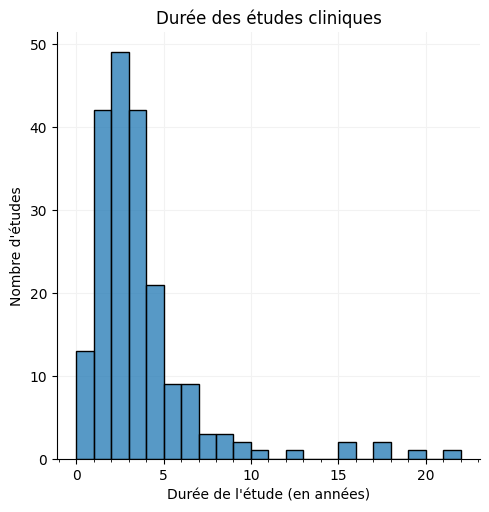

In [62]:
g = sns.displot(
    time_study_duration,
    x=time_study_duration['StudyDurationYear'],
    bins=range(
        0, np.ceil(time_study_duration['StudyDurationYear'].max()).astype('int') + 1
    ),
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

# Title
g.set(
    title='Durée des études cliniques',
    xlabel="Durée de l'étude (en années)",
    ylabel="Nombre d'études",
)

## Statut Open Access des publications :

In [63]:
mask_pmid_unique = ~(df_corrected.loc[:, 'pmid'].duplicated())

# Drop <NA> is_oa
df_oa_status = df_corrected.loc[
    mask_pmid_unique,
    [
        'pmid',
        'type',
        'is_oa',
        'oa_status',
        'primary_topic',
        'subfield',
        'field',
        'domain',
    ],
].dropna()
df_oa_status

,pmid,type,is_oa,oa_status,primary_topic,subfield,field,domain
0,31755936,DERIVED,True,hybrid,Human Immunodeficiency Virus/Acquired Immunode...,Virology,Immunology and Microbiology,Life Sciences
1,33667406,DERIVED,True,green,Efficacy and Safety of Antiretroviral Therapy ...,Infectious Diseases,Medicine,Health Sciences
2,36438274,PUBMED,True,green,Coronavirus Disease 2019 Research,Infectious Diseases,Medicine,Health Sciences
3,37795682,PUBMED,True,hybrid,Coronavirus Disease 2019 Research,Infectious Diseases,Medicine,Health Sciences
5,32661003,DERIVED,True,green,Efficacy and Safety of Antiretroviral Therapy ...,Infectious Diseases,Medicine,Health Sciences
...,...,...,...,...,...,...,...,...
495,20413309,BACKGROUND,True,bronze,"Epidemiology, Classification, and Clinical Fea...",Epidemiology,Medicine,Health Sciences
496,24975859,BACKGROUND,True,green,"Epidemiology, Classification, and Clinical Fea...",Epidemiology,Medicine,Health Sciences
497,38273639,PUBMED,True,bronze,"Epidemiology, Classification, and Clinical Fea...",Epidemiology,Medicine,Health Sciences
498,33717176,DERIVED,True,gold,Malaria,"Public Health, Environmental and Occupational ...",Medicine,Health Sciences


### Taux global:

In [64]:
df_oa_status['is_oa'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

is_oa
True     68.99%
False    31.01%
Name: proportion, dtype: object

### Taux par type:

#### Total :

In [65]:
sum = df_oa_status.groupby(by=['type', 'is_oa'], observed=True).size()
sum

type        is_oa
BACKGROUND  False     32
            True      74
DERIVED     False     28
            True     112
PUBMED      False     10
            True      21
RESULT      False     41
            True      47
SUSPICIOUS  False      9
            True      13
dtype: int64

#### Pourcentage :

In [66]:
(sum / sum.groupby(level=0, observed=True).sum() * 100).round(2).astype(str) + '%'

type        is_oa
BACKGROUND  False    30.19%
            True     69.81%
DERIVED     False     20.0%
            True      80.0%
PUBMED      False    32.26%
            True     67.74%
RESULT      False    46.59%
            True     53.41%
SUSPICIOUS  False    40.91%
            True     59.09%
dtype: object

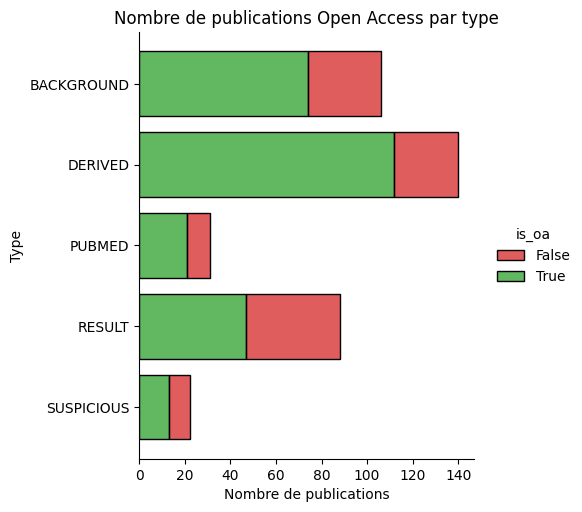

In [67]:
g = sns.displot(
    df_oa_status,
    y='type',
    hue='is_oa',
    discrete=True,
    multiple='stack',
    shrink=0.8,
    palette={False: 'C3', True: 'C2'},
    hue_order=[False, True],
)

# Title
g.set(
    title='Nombre de publications Open Access par type',
    xlabel='Nombre de publications',
    ylabel='Type',
)

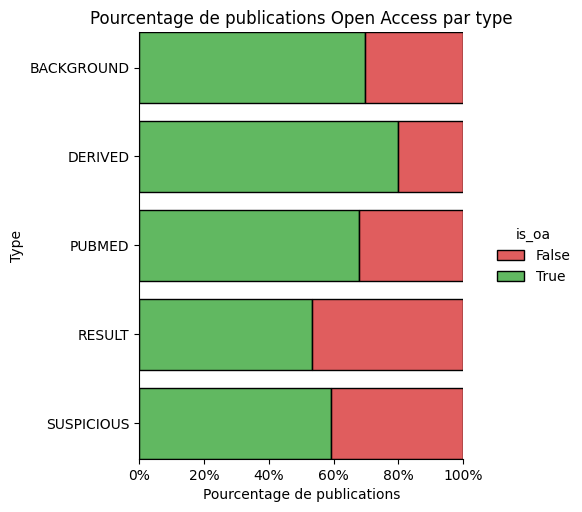

In [68]:
from matplotlib.ticker import PercentFormatter

g = sns.displot(
    df_oa_status,
    y='type',
    hue='is_oa',
    discrete=True,
    multiple='fill',
    stat='percent',
    shrink=0.8,
    palette={False: 'C3', True: 'C2'},
    hue_order=[False, True],
)

g.axes[0][0].xaxis.set_major_formatter(PercentFormatter(1))

# Title
g.set(
    title='Pourcentage de publications Open Access par type',
    xlabel='Pourcentage de publications',
    ylabel='Type',
)

### Status Open Access:

In [69]:
df_oa_status['oa_status'].value_counts()

oa_status
closed    120
bronze     86
gold       77
green      56
hybrid     48
Name: count, dtype: int64

In [70]:
(
    df_oa_status['oa_status'].value_counts(normalize=True).mul(100).round(2).astype(str)
    + '%'
)

oa_status
closed    31.01%
bronze    22.22%
gold       19.9%
green     14.47%
hybrid     12.4%
Name: proportion, dtype: object

### Domain :

In [71]:
df_oa_status['domain'].value_counts()

domain
Health Sciences      312
Life Sciences         58
Social Sciences       14
Physical Sciences      3
Name: count, dtype: int64

### Field :

In [72]:
df_oa_status['field'].value_counts()

field
Medicine                                        306
Immunology and Microbiology                      29
Neuroscience                                     25
Psychology                                        9
Health Professions                                5
Biochemistry, Genetics and Molecular Biology      3
Economics, Econometrics and Finance               3
Mathematics                                       3
Arts and Humanities                               1
Nursing                                           1
Pharmacology, Toxicology and Pharmaceutics        1
Social Sciences                                   1
Name: count, dtype: int64

### Subfield :

In [73]:
df_oa_status['subfield'].value_counts()

subfield
Infectious Diseases                                     126
Hepatology                                               55
Epidemiology                                             40
Cellular and Molecular Neuroscience                      20
Virology                                                 15
Public Health, Environmental and Occupational Health     14
Microbiology                                             13
Ophthalmology                                            11
Psychiatry and Mental health                             10
Neurology                                                10
Emergency Medicine                                        6
Radiology, Nuclear Medicine and Imaging                   6
Physiology                                                5
General Health Professions                                5
Pharmacology                                              4
Oncology                                                  4
Pediatrics, Perinatology and Ch

### Primary topic :

In [74]:
df_oa_status['primary_topic'].value_counts()

primary_topic
Hepatitis C Infection and Treatment                                                53
Prevention and Treatment of HIV/AIDS Infection                                     50
Efficacy and Safety of Antiretroviral Therapy for HIV                              37
Coronavirus Disease 2019                                                           16
Human Immunodeficiency Virus/Acquired Immunodeficiency Syndrome                    15
                                                                                   ..
Intersectionality in LGBTQ+ Mental Health                                           1
Lysosomal Storage Disorders in Human Health and Disease                             1
Macroeconomic Impact of HIV/AIDS in Sub-Saharan Africa                              1
Diagnosis, Treatment, and Epidemiology of Nontuberculous Mycobacterial Diseases     1
Advances in Ultrasound Elastography Imaging Techniques                              1
Name: count, Length: 95, dtype: int64

## Statistiques :

#### Nombre d'études cliniques:

In [75]:
num_trials = len(df_corrected.loc[:, 'NCTId'].unique())
num_trials

201

#### Nombre de publications :

In [76]:
num_publications = df_corrected.loc[:, 'pmid'].notna().sum()
num_publications

394

#### Nombre de publications par types :

In [77]:
df_corrected.loc[:, 'type'].value_counts()

type
DERIVED       142
BACKGROUND    110
RESULT         89
PUBMED         31
SUSPICIOUS     22
Name: count, dtype: int64

#### Nombre d'études sans publications :

In [78]:
num_trials_wo_pub = len(df_corrected.loc[df_corrected.loc[:, 'pmid'].isna(), 'NCTId'])
print("Nombre d'études sans publications:")
print(f'{num_trials_wo_pub} / {num_trials} ({num_trials_wo_pub / num_trials:.2%})')

Nombre d'études sans publications:
106 / 201 (52.74%)


#### Nombre d'études avec au moins une publication :

In [79]:
num_trials_with_pub = len(
    df_corrected.loc[df_corrected.loc[:, 'pmid'].notna(), 'NCTId'].unique()
)
print("Nombre d'études avec au moins une publication :")
print(f'{num_trials_with_pub} / {num_trials} ({num_trials_with_pub / num_trials:.2%})')

Nombre d'études avec au moins une publication :
95 / 201 (47.26%)


In [80]:
assert num_trials == (num_trials_wo_pub + num_trials_with_pub)

#### Nombre d'études avec au moins une publication de type 'RESULT' :

In [81]:
num_trials_with_res = len(
    df_corrected.loc[(df_corrected.loc[:, 'type'] == 'RESULT'), 'NCTId'].unique()
)

In [82]:
print("Nombre d'études avec au moins une publication de type 'RESULT' :")
print(f'{num_trials_with_res} / {num_trials} ({num_trials_with_res / num_trials:.2%})')

Nombre d'études avec au moins une publication de type 'RESULT' :
9 / 201 (4.48%)


**Un nombre très faible d'études déclarent des résultats de type 'RESULT'.**  
Parmis ces études, un nombre encore plus faible concentrent la majorité des publications déclarées comme 'RESULT'.

In [83]:
df_corrected.loc[(df_extract.loc[:, 'type'] == 'RESULT'), 'NCTId'].value_counts()

NCTId
NCT03324633    34
NCT01546181    19
NCT03235258    12
NCT00136630    11
NCT04470648     8
NCT04315948     7
NCT01432821     5
NCT02573948     4
NCT01490489     3
NCT02488395     3
NCT02916732     2
NCT01882062     1
NCT02329054     1
Name: count, dtype: Int64

#### Nombre d'études avec au moins une publication autre que 'BACKGROUND' :

In [84]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_corrected.loc[:, 'NCTId'] == nctid
    if ~((df_corrected.loc[mask, 'type'] == 'BACKGROUND').all()):
        res.append(nctid)

print("Nombre d'études avec au moins une publication autre que 'BACKGROUND' :")
print(f'{len(res)} / {num_trials} ({len(res) / num_trials:.2%})')

Nombre d'études avec au moins une publication autre que 'BACKGROUND' :
90 / 201 (44.78%)


Etudes dont toutes les publications sont de type 'BACKGROUND':

In [85]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_corrected.loc[:, 'NCTId'] == nctid
    if (df_corrected.loc[mask, 'type'] == 'BACKGROUND').all():
        res.append(nctid)
res

['NCT04780191', 'NCT02496312', 'NCT02738502', 'NCT03519503', 'NCT02656407']

## Export pour un traitement manuel

On a constaté qu'on ne peut pas se fier aux données récupérées automatiquement, notamment le type de publications.  
Il va falloir faire une vérification manuelle.

In [86]:
# Copy previous df
df_for_manual_treatment = df_corrected.copy()

#### Ajout d'un lien vers le DOI :

In [87]:
df_for_manual_treatment['doi_link'] = 'https://doi.org/' + df_for_manual_treatment['doi']

#### Ajout d'un lien vers Pubmed :

In [88]:
mask = df_for_manual_treatment['pmid'].notna()
df_for_manual_treatment['pmid_link'] = (
    'https://pubmed.ncbi.nlm.nih.gov/'
    + df_for_manual_treatment.loc[mask, 'pmid'].astype(str)
)

In [89]:
columns_to_export = [
    'NCTId',
    'BriefTitle',
    'HasResults',
    'publication_types',
    # not useful, because mostly 'article',
    # if type different, already in 'publication_types'
    # 'type_openalex',
    'type',
    #'doi',
    'doi_link',
    #'pmid',
    'pmid_link',
    # 'published_date',
]
df_for_manual_treatment.loc[:, columns_to_export]

,NCTId,BriefTitle,HasResults,publication_types,type,doi_link,pmid_link
0,NCT02592174,"Prevalence, Characteristics and Risk Factors o...",False,['Journal Article'],DERIVED,https://doi.org/10.1093/cid/ciz670,https://pubmed.ncbi.nlm.nih.gov/31755936
1,NCT02273765,Raltegravir Versus Efavirenz in Naive HIV-1-in...,False,"['Journal Article', 'Multicenter Study', 'Rand...",DERIVED,https://doi.org/10.1016/S1473-3099(20)30869-0,https://pubmed.ncbi.nlm.nih.gov/33667406
2,NCT05311865,Transmission of Covid-19 During Clubbing Event...,False,['Journal Article'],PUBMED,https://doi.org/10.3389/fpubh.2022.981213,https://pubmed.ncbi.nlm.nih.gov/36438274
3,NCT05311865,Transmission of Covid-19 During Clubbing Event...,False,['Journal Article'],PUBMED,https://doi.org/10.1093/cid/ciad603,https://pubmed.ncbi.nlm.nih.gov/37795682
4,NCT02107365,"Therapy With Asunaprevir, Daclatasvir, Ribavir...",False,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...
495,NCT02481453,Rapamycine vs Placebo for the Treatment of Inc...,False,[],BACKGROUND,https://doi.org/10.1016/j.nmd.2010.03.014,https://pubmed.ncbi.nlm.nih.gov/20413309
496,NCT02481453,Rapamycine vs Placebo for the Treatment of Inc...,False,"['Journal Article', 'Review']",BACKGROUND,https://doi.org/10.1212/WNL.0000000000000642,https://pubmed.ncbi.nlm.nih.gov/24975859
497,NCT02481453,Rapamycine vs Placebo for the Treatment of Inc...,False,['Journal Article'],PUBMED,https://doi.org/10.1016/S2665-9913(20)30280-0,https://pubmed.ncbi.nlm.nih.gov/38273639
498,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,False,"['Journal Article', 'Review']",DERIVED,https://doi.org/10.3389/fimmu.2021.634508,https://pubmed.ncbi.nlm.nih.gov/33717176


#### Export en CSV :

In [90]:
df_for_manual_treatment.loc[:, columns_to_export].to_csv(
    'Data/outputs/df_for_manual_treatment.csv',
    columns=columns_to_export,
    sep=';',
    index=False,
    encoding='utf-8-sig',
)

### Ajout des styles :

Pour simplifier le traitement manuel dans Excel, on rajoute des styles à la DataFrame pour mettre en valeur les données.

#### Type Pubmed :

On souhaite mettre en valeur les publications dont la liste des types contient l'un des termes suivant:

In [91]:
terms_list = [
    'Review',
    'Letter',
    'Meta-Analysis',
    'Review',
    'Comment',
    'Practice Guideline',
]

type_serie_list = [
    df_for_manual_treatment['publication_types']
    .str.contains(term, na=False, regex=False)
    .rename(term)
    for term in terms_list
]
df_type_pub = pd.DataFrame(type_serie_list).T
df_type_pub

,Review,Letter,Meta-Analysis,Review,Comment,Practice Guideline
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
495,False,False,False,False,False,False
496,True,False,False,True,False,False
497,False,False,False,False,False,False
498,True,False,False,True,False,False


In [92]:
df_type_pub.any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496     True
497    False
498     True
499    False
Length: 500, dtype: bool

In [93]:
df_for_manual_treatment.loc[df_type_pub.any(axis=1), 'publication_types']

32                      ['Journal Article', 'Review']
51                                         ['Letter']
61                                         ['Letter']
62                                         ['Letter']
63                      ['Journal Article', 'Review']
64               ['Journal Article', 'Meta-Analysis']
65                      ['Journal Article', 'Review']
66                                         ['Letter']
67          ['Letter', 'Randomized Controlled Trial']
68                      ['Journal Article', 'Review']
72                     ['Journal Article', 'Comment']
75               ['Meta-Analysis', 'Journal Article']
83                      ['Journal Article', 'Review']
84                      ['Journal Article', 'Review']
98                      ['Journal Article', 'Review']
132                      ['Clinical Trial', 'Letter']
138                                        ['Letter']
168                     ['Journal Article', 'Review']
171                     ['Jo

#### Ajout des styles pour l'export vers Excel :

In [94]:
# Function used to highlight a cell with props, if the cell contains value
def highlight_value(v, value, props=''):
    return props if v == value else None


def highlight_type(serie, props=''):
    return [props if s else None for s in df_type_pub.any(axis=1)]


df_stylized = (
    df_for_manual_treatment.loc[:, columns_to_export]
    .style.map(
        highlight_value,
        value=True,
        props='font-weight:bold; background-color: lightgreen;',
        subset=['HasResults'],
    )
    .map(
        highlight_value,
        value='SUSPICIOUS',
        props='font-weight:bold; background-color: #FA2A55;',
        subset=['type'],
    )
    .map(
        highlight_value,
        value='RESULT',
        props='font-weight:bold; background-color: lightgreen;',
        subset=['type'],
    )
    .apply(
        highlight_type,
        props='font-weight:bold; background-color: #FA2A55;',
        subset=['publication_types'],
    )
)
# df_stylized

#### Export vers Excel:

In [95]:
# TODO: export to Excel with appropriate treatment:
# - alternate row shading based on NCTId
# - pmid_link to Pubmed ✔
# - color green 'HasResult' ✔
# - color red 'SUSPICIOUS' type ✔
# - bold type 'RESULT' type ✔
# - header
# - hide doi ? ✔

In [96]:
# df_stylized.to_excel(
#     'Data/outputs/df_for_manual_treatment.xlsx',
#     columns=columns_to_export,
#     index=False,
#     encoding='utf-8-sig',
#     engine='openpyxl',
# )